## Geonames

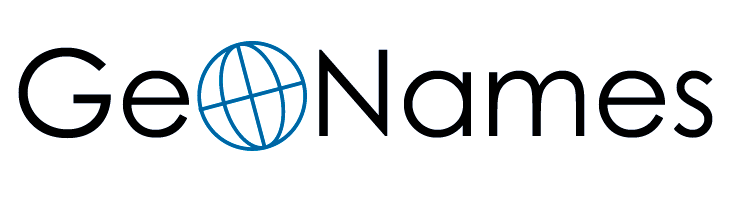

* [live example](http://www.geonames.org/search.html?q=cork+ireland&country=)
* The geonames geographical database is available for download free of charge under a creative commons attribution license.
* It contains over 10 million geographical names and consists of over 9 million unique features, whereof 2.8 million populated places and 5.5 million alternate names.

In [1]:
import os

from dotenv import load_dotenv
load_dotenv()

GEONAMES_KEY = os.environ['GEONAMES_KEY']

In [2]:
from io import BytesIO
from zipfile import ZipFile

import requests
import pandas as pd

COLUMNS = '''
geonameid
name unicode
name ascii
alternatenames
latitude
longitude
feature class
feature code
country code
alternate country code
fipscode
admin. division 2
admin. division 3
admin. division 4
population
elevation
digital elevation model
timezone
modification date
'''
COLUMNS = [x.strip() for x in COLUMNS.split('\n') if x.strip()]

def get_cities():
    r = requests.get('http://download.geonames.org/export/dump/cities1000.zip')
    zip_data = BytesIO(r.content)

    with ZipFile(zip_data, 'r') as archive:
        with archive.open('cities1000.txt') as fhandle:
            for city in fhandle:
                city = city.decode('utf-8')
                parts = city.split('\t')
                yield dict(zip(COLUMNS, parts))

In [3]:
cities_list = list(get_cities())

cities_df = pd.DataFrame(cities_list)
cities_df = cities_df.reindex(COLUMNS, axis=1)
cities_df.head()

,geonameid,name unicode,name ascii,alternatenames,latitude,longitude,feature class,feature code,country code,alternate country code,fipscode,admin. division 2,admin. division 3,admin. division 4,population,elevation,digital elevation model,timezone,modification date
0,3039154,El Tarter,El Tarter,"Ehl Tarter,Эл Тартер",42.57952,1.65362,P,PPL,AD,,02,,,,1052,,1721,Europe/Andorra,2012-11-03\n
1,3039163,Sant Julià de Lòria,Sant Julia de Loria,"San Julia,San Julià,Sant Julia de Loria,Sant J...",42.46372,1.49129,P,PPLA,AD,,06,,,,8022,,921,Europe/Andorra,2013-11-23\n
2,3039604,Pas de la Casa,Pas de la Casa,"Pas de la Kasa,Пас де ла Каса",42.54277,1.73361,P,PPL,AD,,03,,,,2363,2050,2106,Europe/Andorra,2008-06-09\n
3,3039678,Ordino,Ordino,"Ordino,ao er di nuo,orudino jiao qu,Ордино,オルデ...",42.55623,1.53319,P,PPLA,AD,,05,,,,3066,,1296,Europe/Andorra,2018-10-26\n
4,3040051,les Escaldes,les Escaldes,"Ehskal'des-Ehndzhordani,Escaldes,Escaldes-Engo...",42.50729,1.53414,P,PPLA,AD,,08,,,,15853,,1033,Europe/Andorra,2008-10-15\n


In [4]:
len(cities_df)

135088

In [5]:
df = cities_df
df.loc[df['name ascii'] == 'Dublin']

,geonameid,name unicode,name ascii,alternatenames,latitude,longitude,feature class,feature code,country code,alternate country code,fipscode,admin. division 2,admin. division 3,admin. division 4,population,elevation,digital elevation model,timezone,modification date
56228,2964574,Dublin,Dublin,"Baile Atha Cliath,Baile Átha Cliath,Ciuda de D...",53.33306,-6.24889,P,PPLC,IE,,L,33,,,1024027,,17,Europe/Dublin,2019-09-05\n
117587,4192205,Dublin,Dublin,"DBN,Dablin,Dublin,dablina,dablyn jwrjya,dabur...",32.54044,-82.90375,P,PPLA2,US,,GA,175,,,16197,67,73,America/New_York,2017-03-09\n
121835,4687151,Dublin,Dublin,"Dablin,Dublin,dbln,deobeullin,dwblyn tgzas,Да...",32.08514,-98.34199,P,PPL,US,,TX,143,,,3664,446,453,America/Chicago,2017-03-09\n
122593,4756557,Dublin,Dublin,"Dablin,Dublin,PSK,dwblyn,Даблин,Дублин,دوبلين,...",37.10568,-80.68534,P,PPL,US,,VA,155,,,2686,635,632,America/New_York,2017-03-09\n
125851,5085564,Dublin,Dublin,"Dablin,Dublin,Monadnock Number 2,dablyn nywhm...",42.90758,-72.06258,P,PPL,US,,NH,005,19140,,1572,454,462,America/New_York,2017-05-23\n
127435,5152333,Dublin,Dublin,"Dablin,Dublin,Dublinas,daburin,dbln,deobeullin...",40.09923,-83.11408,P,PPL,US,,OH,049,22694,,45098,253,253,America/New_York,2017-05-23\n
127929,5187443,Dublin,Dublin,"Double Inn,Dublin,Дублин",40.37177,-75.20156,P,PPL,US,,PA,017,20104,,2169,177,176,America/New_York,2017-05-23\n
129656,5344157,Dublin,Dublin,"Amador,Dablin,Dougherty's Station,Dublin,dabli...",37.70215,-121.93579,P,PPL,US,,CA,001,,,57721,112,108,America/Los_Angeles,2017-03-09\n


In [6]:
import geocoder

g = geocoder.geonames('Dublin, Ireland', key=GEONAMES_KEY, maxRows=1)
g = geocoder.geonames(g.geonames_id, method='details', key=GEONAMES_KEY, maxRows=1)
dublin = g
g.geojson

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'address': 'Dublin',
    'admin2': 'Dublin City',
    'admin2_geonames_id': '7778677',
    'bbox': [-6.47794660695175,
     53.2166421043235,
     -6.0442433543983,
     53.4247860458301],
    'class_description': 'city, village,...',
    'code': 'PPLC',
    'confidence': 1,
    'continent': 'EU',
    'country': 'Ireland',
    'country_code': 'IE',
    'country_geonames_id': '2963597',
    'description': 'capital of a political entity',
    'dstOffset': 1,
    'feature_class': 'P',
    'geonames_id': 2964574,
    'lat': '53.33306',
    'lng': '-6.24889',
    'ok': True,
    'population': 1024027,
    'raw': {'timezone': {'gmtOffset': 0,
      'timeZoneId': 'Europe/Dublin',
      'dstOffset': 1},
     'bbox': {'east': -6.0442433543983,
      'south': 53.2166421043235,
      'north': 53.4247860458301,
      'west': -6.47794660695175,
      'accuracyLevel': 0},
     'asciiName': 'Dublin',
     'astergdem': 3

## Finding close-by features

And the worst possible way of doing it ;)

In [7]:
import math
def euclidean_dist(lat1, lng1, lat2, lng2):
    return math.sqrt((lat2-lat1)**2 + (lng2-lng1)**2)

# super stupid and inefficient way of doing this ;)
# easier than to spin up an elasticsearch, geosql solution
lat = float(dublin.lat)
lng = float(dublin.lng)
closest = sorted(cities_list, key=lambda x: euclidean_dist(lat, lng, float(x['latitude']), float(x['longitude'])))

In [8]:
df = pd.DataFrame(closest)
df = df.reindex(COLUMNS, axis=1)
df.head(10)

,geonameid,name unicode,name ascii,alternatenames,latitude,longitude,feature class,feature code,country code,alternate country code,fipscode,admin. division 2,admin. division 3,admin. division 4,population,elevation,digital elevation model,timezone,modification date
0,2964574,Dublin,Dublin,"Baile Atha Cliath,Baile Átha Cliath,Ciuda de D...",53.33306,-6.24889,P,PPLC,IE,,L,33,,,1024027,,17,Europe/Dublin,2019-09-05\n
1,2961896,Rathmines,Rathmines,"Rath Maonais,Rathmines,Ratmajns,Ráth Maonais,Р...",53.32028,-6.26333,P,PPLX,IE,,L,33,,,11044,,27,Europe/Dublin,2019-01-09\n
2,6691002,Milltown,Milltown,,53.31301,-6.2453,P,PPLX,IE,,L,34,,,4049,,25,Europe/Dublin,2017-07-20\n
3,2961816,Ringsend,Ringsend,Ringsend,53.34194,-6.22639,P,PPLX,IE,,L,33,,,8202,,4,Europe/Dublin,2017-07-25\n
4,6691003,Clonskeagh,Clonskeagh,,53.31467,-6.23148,P,PPLX,IE,,L,33,,,4500,,18,Europe/Dublin,2017-07-25\n
5,2961589,Sandymount,Sandymount,"Dumhach Thra,Dumhach Thrá,Sandymount",53.32815,-6.22224,P,PPL,IE,,L,33,,,8967,,1,Europe/Dublin,2019-01-09\n
6,3315287,Rathgar,Rathgar,,53.31457,-6.275,P,PPL,IE,,L,33,,,8394,,39,Europe/Dublin,2016-09-12\n
7,2964745,Donnybrook,Donnybrook,,53.31375,-6.22274,P,PPL,IE,,L,33,,,10645,,17,Europe/Dublin,2017-07-25\n
8,7838916,Fairview,Fairview,,53.36597,-6.23985,P,PPL,IE,,L,33,,,3821,,9,Europe/Dublin,2016-09-12\n
9,3315312,Drumcondra,Drumcondra,"Dramkondra,Droim Conrach,Драмкондра",53.37058,-6.25298,P,PPL,IE,,L,33,,,4465,,14,Europe/Dublin,2017-07-25\n
